# Basic Machine Learning on MP

## Import module and data
Load the Materials Project dataset as a `pandas.DataFrame`, which is saved when running the `mp/download.py` script (see `README.md` for directions)

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import umap

In [2]:
MATERIALS_PROJECT_PKL = os.path.join("mp","materials_project.pkl")
mpdf = pd.read_pickle(MATERIALS_PROJECT_PKL)
mpdf.head()

,material_id,anonymous_formula,band_gap,band_structure,bandstructure_uniform,blessed_tasks,bond_valence,chemsys,cif,created_at,...,ordering,is_magnetic,exchange_symmetry,num_unique_magnetic_sites,types_of_magnetic_species,magmoms,total_magnetization_normalized_vol,total_magnetization_normalized_formula_units,num_magnetic_sites,true_total_magnetization
0,mp-862690,{'A': 1.0},0.0,None,None,"{'GGA NSCF Uniform': 'mp-1004086', 'GGA Static...",None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2014-08-23 01:06:11,...,NM,False,194,0,[],"[0, 0, 0, 0]",1.611105e-04,0.007333,0,0.029332
1,mp-1183057,{'A': 1.0},0.0,None,None,{'GGA Static': 'mp-1404739'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:11.515000,...,NM,False,152,0,[],"[0, 0, 0]",1.676193e-04,0.007600,0,0.022801
2,mp-1183069,{'A': 1.0},0.0,None,None,{'GGA Static': 'mp-1504767'},None,Ac,# generated using pymatgen\ndata_Ac\n_symmetry...,2019-01-11 11:43:44.199000,...,NM,False,166,0,[],"[0, 0, 0]",9.131548e-04,0.041015,0,0.123046
3,mp-989737,{'A': 1.0},0.0,None,None,{'GGA Static': 'mp-1415578'},None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2015-12-16 14:33:29,...,NM,False,166,0,[],"[0, 0, 0]",4.692753e-04,0.008471,0,0.025413
4,mp-8566,{'A': 1.0},0.0,None,None,"{'GGA NSCF Uniform': 'mp-922443', 'GGA Static'...",None,Ag,# generated using pymatgen\ndata_Ag\n_symmetry...,2011-05-28 01:39:32,...,NM,False,194,0,[],"[0, 0, 0, 0]",7.053656e-08,0.000001,0,0.000005


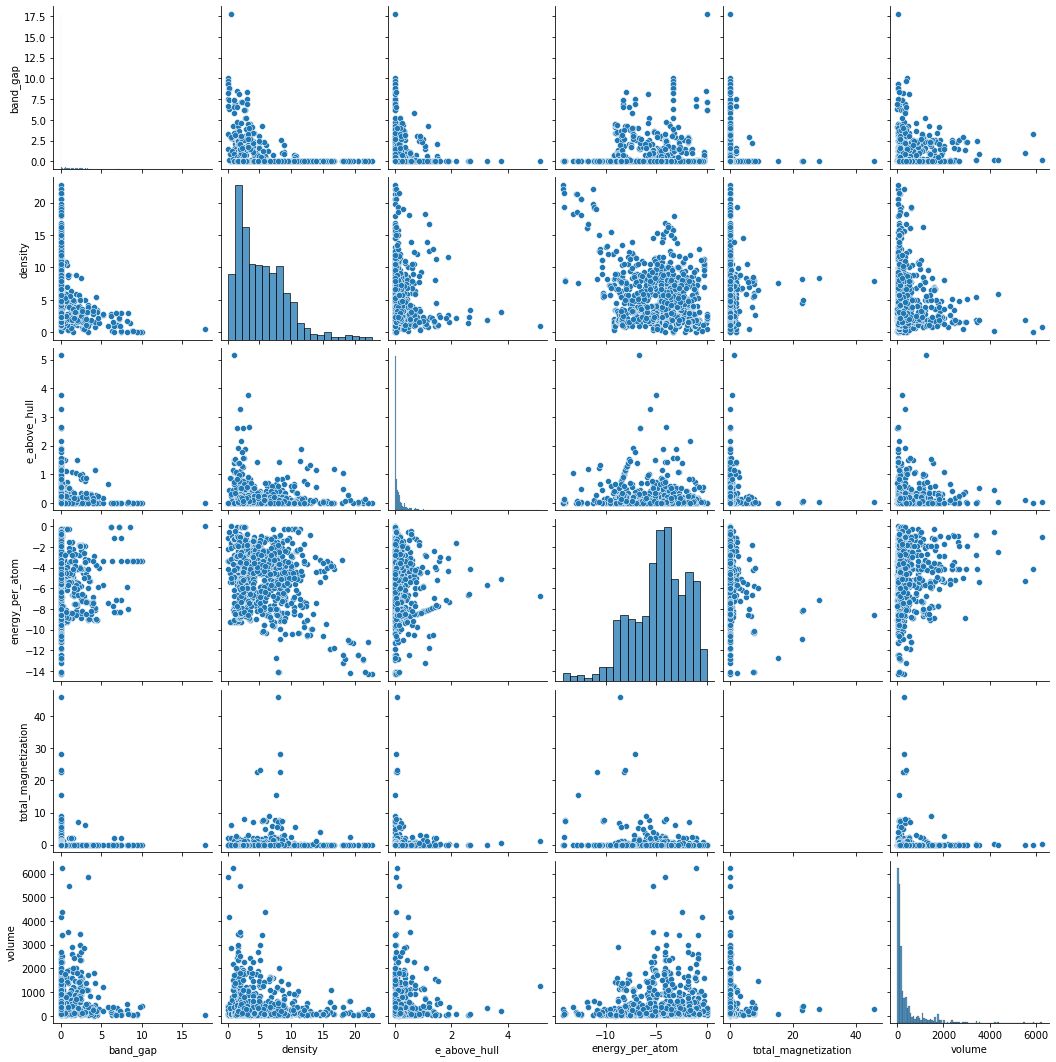

In [3]:
umap_data = mpdf[[
    "band_gap",
    "density",
    "e_above_hull",
    "energy_per_atom",
    "total_magnetization",
    "volume",
]].dropna()
nb_in_plot = 1000
sns.pairplot(umap_data.iloc[0:nb_in_plot])#, hue='total_magnetization')

## UMAP

In [4]:
scaled_data = StandardScaler().fit_transform(
    mpdf[[
        "band_gap",
        "density",
        "e_above_hull",
        "energy_per_atom",
        # "total_magnetization",  # remove the "target"
        "volume",
    ]].dropna().values
)
reducer = umap.UMAP(n_components=3)
embedding = reducer.fit_transform(scaled_data)
embedding.shape

(126143, 3)

Text(0.5, 1.0, 'UMAP projection')

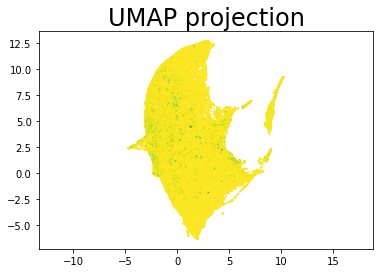

In [5]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    s=0.8,
    c=-umap_data.total_magnetization
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection', fontsize=24)

## PCA

Text(0.5, 1.0, 'PCA projection')

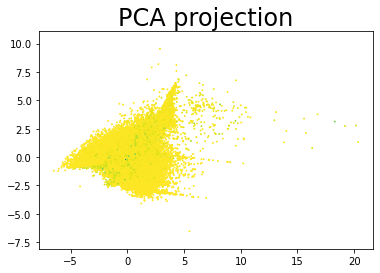

In [6]:
pca = decomposition.PCA(n_components=3)
pca.fit(scaled_data)
pca_embedding = pca.transform(scaled_data)

plt.scatter(
    pca_embedding[:, 0],
    pca_embedding[:, 1],
    s=0.8,
    c=-umap_data.total_magnetization
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('PCA projection', fontsize=24)